# NYCDSA - PDA Class April 2019 -  Bob Trieste 
```
bobtrieste@gmail.com | 917-806-6333
```

## Final Project
### Federal Reserve Open Market Committee Analysis### 
### Comparison of the Dec 2018 FOMC statement with that of March 2019 ###

**Abstract** In late December of 2018, the US stock market started to digest weakness across continental Europe coupled with weaker internal readings of China's economy. This weakness was further exaccerabted on December 20th, 2018 when the Federal Reserve Open Market Committee released their interest rate decision along with a statement on the economy.


The market feared that Chairman Powell along with other FOMC voting members would outline a steeper path of interest rate increases and focus more on the internal strength of the US economy based on strong job numbers despite lack of wage growth and also place less of a focus on the global economy. 

I performed a text scrape of the full minutes from both the Dec 2018 FOMC statement with the subsequent Mar 2019 FOMC statement, cleaned the text and then performed a word count to look for key differences in trigger words that market participants look for to signal the Feds intentions of forward rate paths.

**Observations** In the March 2019 statement, We could observe a higher count of words ``` Risks ``` , ``` Uncertainty ``` and ``` Projections ``` . Additionally, the March 2019 saw the introduction of the word ``` Subdued ``` , which was completely absent from the previous December 2018 statement.

The March 2019 statement could be interpreted as more "Dovish" in nature and signaled that the FEd was toning down it's plans for steeper forward rate paths. The US stock market subsequently moved higher during the 1st Quarter of 2019, recovering its losses from Q4 2018. 

**Trouble with my code** 
 - I had some difficulty after cleaning the text, converting the results of the "word count" which were in ``` list ``` form and 
 converting that to its own ```dataFrame ```.
   - this was the key line to fixing that **===>** ``` df3=pd.merge(df1, df2, on ='words', left_index=True) ```
 - I struggled to get the actual "Term Labels" from column 0 of the dataFrame onto to the horizontal bars in the vizualization step.
 - I played around with adding a WordCloud but do not think I emplemented it correctly. 

In [1]:
import numpy
import pandas as pd
import csv
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
f = open('fomcminutes20181219.txt', 'r') 
f.read()

'Minutes of the Federal Open Market Committee \n\nDecember 18–19, 2018 \n\n \n\nA joint meeting of the Federal Open Market Committee \nand the Board of Governors was held in the offices of \nthe Board of Governors of the Federal Reserve System \nin Washington, D.C., on Tuesday, December 18, 2018, \nat 1:00 p.m. and continued on Wednesday, December \n19, 2018, at 9:00 a.m.1 \n\n1 The Federal Open Market Committee is referenced as the \n“FOMC” and the “Committee” in these minutes. \n\n2 Attended through the discussion of developments in financial \nmarkets and open market operations. \n\n \n\nPRESENT: \n\nJerome H. Powell, Chairman \n\nJohn C. Williams, Vice Chairman \n\nThomas I. Barkin \n\nRaphael W. Bostic \n\nMichelle W. Bowman \n\nLael Brainard \n\nRichard H. Clarida \n\nMary C. Daly \n\nLoretta J. Mester \n\nRandal K. Quarles \n\n \n\nJames Bullard, Charles L. Evans, Esther L. George, \nEric Rosengren, and Michael Strine, Alternate \nMembers of the Federal Open Market Committee \n\

In [4]:
f = open('fomcminutes20190320.txt', 'r') 
f.read()

'Minutes of the Federal Open Market Committee \nMarch 19–20, 2019 \nA joint meeting of the Federal Open Market Committee \nand the Board of Governors was held in the offices of \nthe Board of Governors of the Federal Reserve System \nin Washington, D.C., on Tuesday, March 19, 2019, at \n10:00 a.m. and continued on Wednesday, \nMarch 20, 2019, at 9:00 a.m.1 \nPRESENT: \nJerome H. Powell, Chair \nJohn C. Williams, Vice Chair \nMichelle W. Bowman \nLael Brainard \nJames Bullard \nRichard H. Clarida \nCharles L. Evans \nEsther L. George \nRandal K. Quarles \nEric Rosengren \nPatrick Harker, Robert S. Kaplan, Neel Kashkari, \nLoretta J. Mester, and Michael Strine, Alternate \nMembers of the Federal Open Market Committee \nThomas I. Barkin, Raphael W. Bostic, and Mary C. \nDaly, Presidents of the Federal Reserve Banks of \nRichmond, Atlanta, and San Francisco, respectively \nJames A. Clouse, Secretary \nMatthew M. Luecke, Deputy Secretary \nDavid W. Skidmore, Assistant Secretary \nMichelle A

In [5]:
import string
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [2]:
def text_cleaner(in_name,out_name,punc=list('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')):
    f_in=open(in_name,'r')
    f_out=open(out_name,'w')
    lines=f_in.readlines()
    f_in.close()
    for line in lines:
        line=line.lower()
        for mark in punc:
            line=line.replace(mark,'')
        f_out.write(line)
    f_out.close()
    print(out_name,'has been written')

In [3]:
#Your code here
punc=list('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')

In [4]:
text_cleaner('fomcminutes20181219.txt','fomcminutes20181219_clean.txt')

fomcminutes20181219_clean.txt has been written


In [5]:
text_cleaner('fomcminutes20190320.txt','fomcminutes20190320_clean.txt')

fomcminutes20190320_clean.txt has been written


In [10]:
S='fomcminutes20181219_clean.txt'
words=S.split()
D={}
for word in words:
    if word in D:
        D[word]=D[word]+1
    else:
        D[word]=1
D

{'fomcminutes20181219_clean.txt': 1}

In [11]:
L=list(D.items())
print(L)


[('fomcminutes20181219_clean.txt', 1)]


In [12]:
sorted(L,key=lambda x:x[1],reverse=True)

[('fomcminutes20181219_clean.txt', 1)]

In [12]:
#your code here
def wordCounter(in_name):
    f_in=open(in_name,'r',encoding="ISO-8859-1")
    lines=f_in.readlines()
    f_in.close()
    
    D={}
    
    for line in lines:
        line=line.strip()
        line=line.lower()
        for mark in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~':
            line=line.replace(mark,'')
        words=line.split()
        for word in words:
            if word in D:
                D[word]+=1
            else:
                D[word]=1

    
    L=list(D.items())
    return sorted(L,key=lambda x:x[1],reverse=True)

In [14]:
wordCounter('fomcminutes20181219_clean.txt')

[('the', 914),
 ('of', 505),
 ('in', 341),
 ('and', 327),
 ('to', 314),
 ('a', 167),
 ('that', 152),
 ('for', 150),
 ('rate', 125),
 ('on', 118),
 ('participants', 105),
 ('federal', 98),
 ('inflation', 89),
 ('as', 88),
 ('economic', 86),
 ('projections', 71),
 ('growth', 70),
 ('market', 67),
 ('with', 66),
 ('their', 63),
 ('be', 63),
 ('at', 62),
 ('percent', 61),
 ('funds', 57),
 ('would', 57),
 ('over', 57),
 ('policy', 55),
 ('were', 55),
 ('board', 47),
 ('by', 47),
 ('risks', 46),
 ('was', 44),
 ('monetary', 43),
 ('outlook', 43),
 ('real', 41),
 ('financial', 40),
 ('conditions', 40),
 ('reserve', 39),
 ('from', 39),
 ('than', 39),
 ('governors', 38),
 ('committee', 36),
 ('uncertainty', 36),
 ('or', 33),
 ('continued', 32),
 ('2', 31),
 ('recent', 31),
 ('unemployment', 31),
 ('are', 29),
 ('gdp', 29),
 ('prices', 29),
 ('through', 28),
 ('november', 28),
 ('level', 28),
 ('range', 28),
 ('had', 28),
 ('labor', 28),
 ('could', 27),
 ('more', 27),
 ('longerrun', 27),
 ('remai

In [15]:
L

[('fomcminutes20181219_clean.txt', 1)]

In [16]:
df1=wordCounter('fomcminutes20181219_clean.txt')
df1

[('the', 914),
 ('of', 505),
 ('in', 341),
 ('and', 327),
 ('to', 314),
 ('a', 167),
 ('that', 152),
 ('for', 150),
 ('rate', 125),
 ('on', 118),
 ('participants', 105),
 ('federal', 98),
 ('inflation', 89),
 ('as', 88),
 ('economic', 86),
 ('projections', 71),
 ('growth', 70),
 ('market', 67),
 ('with', 66),
 ('their', 63),
 ('be', 63),
 ('at', 62),
 ('percent', 61),
 ('funds', 57),
 ('would', 57),
 ('over', 57),
 ('policy', 55),
 ('were', 55),
 ('board', 47),
 ('by', 47),
 ('risks', 46),
 ('was', 44),
 ('monetary', 43),
 ('outlook', 43),
 ('real', 41),
 ('financial', 40),
 ('conditions', 40),
 ('reserve', 39),
 ('from', 39),
 ('than', 39),
 ('governors', 38),
 ('committee', 36),
 ('uncertainty', 36),
 ('or', 33),
 ('continued', 32),
 ('2', 31),
 ('recent', 31),
 ('unemployment', 31),
 ('are', 29),
 ('gdp', 29),
 ('prices', 29),
 ('through', 28),
 ('november', 28),
 ('level', 28),
 ('range', 28),
 ('had', 28),
 ('labor', 28),
 ('could', 27),
 ('more', 27),
 ('longerrun', 27),
 ('remai

In [6]:
import nltk
from nltk import corpus
from nltk import tokenize

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bobtr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bobtr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
set_1= "This is a sample sentence, showing off the stop words filtration."

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(set_1)

filtered_set = [w for w in word_tokens if not w in stop_words]

filtered_set = []

for w in word_tokens:
    if w not in stop_words:
        filtered_set.append(w)
        
        

In [20]:
print(word_tokens) 
print(filtered_set) 

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


In [9]:
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
#word_tokenize accepts a string as an input, not a file. 
stop_words = set(stopwords.words('english')) 
file1 = open("fomcminutes20181219_clean.txt") 
line = file1.read()# Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('2018_dec_filteredtext.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 

In [10]:
stop_words = set(stopwords.words('english')) 
file2 = open("fomcminutes20190320_clean.txt") 
line = file2.read()# Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('2019_mar_filteredtext.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 

In [13]:
df_2018=wordCounter('2018_dec_filteredtext.txt')
df_2018

[('rate', 125),
 ('participants', 105),
 ('federal', 98),
 ('inflation', 89),
 ('economic', 86),
 ('projections', 71),
 ('growth', 70),
 ('market', 67),
 ('percent', 61),
 ('funds', 57),
 ('would', 57),
 ('policy', 55),
 ('board', 47),
 ('risks', 46),
 ('monetary', 43),
 ('outlook', 43),
 ('real', 41),
 ('financial', 40),
 ('conditions', 40),
 ('reserve', 39),
 ('governors', 38),
 ('committee', 36),
 ('uncertainty', 36),
 ('continued', 32),
 ('2', 31),
 ('recent', 31),
 ('unemployment', 31),
 ('gdp', 29),
 ('prices', 29),
 ('november', 28),
 ('level', 28),
 ('range', 28),
 ('labor', 28),
 ('could', 27),
 ('longerrun', 27),
 ('remained', 27),
 ('meeting', 26),
 ('also', 26),
 ('2018', 25),
 ('lower', 25),
 ('appropriate', 24),
 ('division', 23),
 ('period', 23),
 ('price', 23),
 ('markets', 22),
 ('noted', 22),
 ('rates', 22),
 ('expected', 22),
 ('open', 21),
 ('developments', 21),
 ('staff', 21),
 ('balance', 21),
 ('september', 21),
 ('strong', 21),
 ('activity', 21),
 ('2021', 21),


In [14]:
df_2019=wordCounter('2019_mar_filteredtext.txt')
df_2019

[('projections', 160),
 ('rate', 149),
 ('participants', 144),
 ('federal', 123),
 ('2', 113),
 ('inflation', 112),
 ('economic', 100),
 ('percent', 99),
 ('growth', 80),
 ('market', 79),
 ('would', 75),
 ('20', 72),
 ('\x96', 72),
 ('funds', 71),
 ('policy', 69),
 ('4', 68),
 ('8', 68),
 ('committee', 66),
 ('2019', 62),
 ('3', 62),
 ('uncertainty', 60),
 ('range', 60),
 ('1', 57),
 ('risks', 55),
 ('monetary', 54),
 ('18', 54),
 ('appropriate', 51),
 ('year', 51),
 ('december', 51),
 ('level', 50),
 ('real', 48),
 ('unemployment', 48),
 ('6', 46),
 ('march', 45),
 ('remained', 42),
 ('securities', 41),
 ('gdp', 40),
 ('board', 39),
 ('balance', 39),
 ('longerrun', 39),
 ('recent', 39),
 ('2021', 39),
 ('meeting', 37),
 ('conditions', 37),
 ('quarter', 37),
 ('open', 36),
 ('reserves', 36),
 ('average', 36),
 ('number', 36),
 ('median', 36),
 ('confidence', 36),
 ('lower', 35),
 ('12', 35),
 ('target', 34),
 ('pce', 34),
 ('16', 34),
 ('governors', 32),
 ('reserve', 32),
 ('run', 32),

In [15]:
from pandas import DataFrame

In [16]:
data = [('rate', 125),
 ('participants', 105),
 ('federal', 98),
 ('inflation', 89),
 ('economic', 86),
 ('projections', 71),
 ('growth', 70),
 ('market', 67),
 ('percent', 61),
 ('funds', 57),
 ('would', 57),
 ('policy', 55),
 ('board', 47),
 ('risks', 46),
 ('monetary', 43),
 ('outlook', 43),
 ('real', 41),
 ('financial', 40),
 ('conditions', 40),
 ('reserve', 39),
 ('governors', 38),
 ('committee', 36),
 ('uncertainty', 36),
 ('continued', 32),
 ('2', 31),
 ('recent', 31),
 ('unemployment', 31),
 ('gdp', 29),
 ('prices', 29),
 ('november', 28),
 ('level', 28),
 ('range', 28),
 ('labor', 28),
 ('could', 27),
 ('longerrun', 27),
 ('remained', 27),
 ('meeting', 26),
 ('also', 26),
 ('2018', 25),
 ('lower', 25),
 ('appropriate', 24),
 ('division', 23),
 ('period', 23),
 ('price', 23),
 ('markets', 22),
 ('noted', 22),
 ('rates', 22),
 ('expected', 22),
 ('open', 21),
 ('developments', 21),
 ('staff', 21),
 ('balance', 21),
 ('september', 21),
 ('strong', 21),
 ('activity', 21),
 ('2021', 21),
 ('december', 20),
 ('path', 20),
 ('median', 20),
 ('pce', 20),
 ('business', 20),
 ('2019', 20),
 ('target', 19),
 ('treasury', 19),
 ('global', 19),
 ('consumer', 19),
 ('banks', 18),
 ('new', 18),
 ('including', 18),
 ('downside', 18),
 ('members', 17),
 ('reserves', 17),
 ('pace', 17),
 ('trade', 17),
 ('near', 17),
 ('20', 17),
 ('future', 17),
 ('total', 17),
 ('information', 16),
 ('little', 16),
 ('likely', 16),
 ('months', 16),
 ('average', 16),
 ('generally', 16),
 ('operations', 15),
 ('interest', 15),
 ('factors', 15),
 ('basis', 15),
 ('quarter', 15),
 ('spending', 15),
 ('increases', 15),
 ('forecast', 15),
 ('measures', 14),
 ('year', 14),
 ('october', 14),
 ('slightly', 14),
 ('core', 14),
 ('2020', 14),
 ('participants\x92', 14),
 ('longrun', 13),
 ('levels', 13),
 ('declined', 13),
 ('gradual', 13),
 ('however', 13),
 ('committee\x92s', 13),
 ('increase', 13),
 ('securities', 13),
 ('consistent', 13),
 ('foreign', 13),
 ('us', 13),
 ('oil', 13),
 ('expectations', 13),
 ('relative', 13),
 ('estimate', 13),
 ('past', 13),
 ('credit', 13),
 ('projection', 13),
 ('assessment', 13),
 ('discussion', 12),
 ('affairs', 12),
 ('provide', 12),
 ('several', 12),
 ('nominal', 12),
 ('intermeeting', 12),
 ('end', 12),
 ('sep', 12),
 ('fourth', 12),
 ('declines', 12),
 ('around', 12),
 ('figures', 12),
 ('secretary', 11),
 ('deputy', 11),
 ('director', 11),
 ('fomc', 11),
 ('current', 11),
 ('upward', 11),
 ('time', 11),
 ('economy', 11),
 ('weighted', 11),
 ('increased', 11),
 ('household', 11),
 ('forecasts', 11),
 ('upside', 11),
 ('assessments', 11),
 ('judged', 11),
 ('symmetric', 11),
 ('table', 11),
 ('1', 10),
 ('account', 10),
 ('effective', 10),
 ('pressures', 10),
 ('reported', 10),
 ('decline', 10),
 ('liabilities', 10),
 ('commented', 10),
 ('although', 10),
 ('many', 10),
 ('couple', 10),
 ('years', 10),
 ('pointed', 10),
 ('corporate', 10),
 ('yields', 10),
 ('low', 10),
 ('effects', 10),
 ('equity', 10),
 ('data', 10),
 ('run', 10),
 ('balanced', 10),
 ('outcomes', 10),
 ('senior', 9),
 ('portfolio', 9),
 ('reserve\x92s', 9),
 ('size', 9),
 ('one', 9),
 ('stance', 9),
 ('concerns', 9),
 ('longer', 9),
 ('projected', 9),
 ('higher', 9),
 ('remain', 9),
 ('change', 9),
 ('gains', 9),
 ('rising', 9),
 ('tightening', 9),
 ('individual', 9),
 ('contacts', 9),
 ('broadly', 9),
 ('shown', 9),
 ('4a', 9),
 ('4c', 9),
 ('confidence', 9),
 ('system', 8),
 ('associate', 8),
 ('manager', 8),
 ('bank', 8),
 ('implementation', 8),
 ('york', 8),
 ('various', 8),
 ('sheet', 8),
 ('ioer', 8),
 ('survey', 8),
 ('since', 8),
 ('pressure', 8),
 ('still', 8),
 ('significant', 8),
 ('domestic', 8),
 ('risk', 8),
 ('appeared', 8),
 ('spreads', 8),
 ('less', 8),
 ('issuance', 8),
 ('changed', 8),
 ('term', 8),
 ('investment', 8),
 ('indicators', 8),
 ('energy', 8),
 ('may', 8),
 ('agreed', 8),
 ('view', 8),
 ('objective', 8),
 ('errors', 8),
 ('held', 7),
 ('w', 7),
 ('j', 7),
 ('presidents', 7),
 ('david', 7),
 ('assistant', 7),
 ('office', 7),
 ('close', 7),
 ('associated', 7),
 ('number', 7),
 ('distribution', 7),
 ('slowing', 7),
 ('options', 7),
 ('holdings', 7),
 ('agency', 7),
 ('mbs', 7),
 ('demand', 7),
 ('curve', 7),
 ('point', 7),
 ('suggested', 7),
 ('expressed', 7),
 ('reflecting', 7),
 ('part', 7),
 ('sentiment', 7),
 ('based', 7),
 ('readings', 7),
 ('compensation', 7),
 ('downward', 7),
 ('two', 7),
 ('longerterm', 7),
 ('employment', 7),
 ('net', 7),
 ('modestly', 7),
 ('capital', 7),
 ('bit', 7),
 ('historical', 7),
 ('revised', 7),
 ('incoming', 7),
 ('viewed', 7),
 ('similar', 7),
 ('overall', 7),
 ('surrounding', 7),
 ('figure', 7),
 ('distributions', 7),
 ('panels', 7),
 ('fan', 7),
 ('variables', 7),
 ('intervals', 7),
 ('respectively', 6),
 ('e', 6),
 ('stability', 6),
 ('research', 6),
 ('statistics', 6),
 ('potential', 6),
 ('rise', 6),
 ('money', 6),
 ('well', 6),
 ('within', 6),
 ('discussed', 6),
 ('approach', 6),
 ('might', 6),
 ('used', 6),
 ('expansion', 6),
 ('cited', 6),
 ('continue', 6),
 ('widened', 6),
 ('implications', 6),
 ('indicated', 6),
 ('previous', 6),
 ('anticipated', 6),
 ('additional', 6),
 ('primary', 6),
 ('vote', 6),
 ('percentage', 6),
 ('job', 6),
 ('measure', 6),
 ('third', 6),
 ('rose', 6),
 ('trend', 6),
 ('government', 6),
 ('points', 6),
 ('shifted', 6),
 ('moderated', 6),
 ('expect', 6),
 ('medium', 6),
 ('submitted', 6),
 ('assess', 6),
 ('participant', 6),
 ('h', 5),
 ('john', 5),
 ('c', 5),
 ('vice', 5),
 ('michael', 5),
 ('general', 5),
 ('economist', 5),
 ('directors', 5),
 ('principal', 5),
 ('provided', 5),
 ('related', 5),
 ('excess', 5),
 ('effr', 5),
 ('somewhat', 5),
 ('volatile', 5),
 ('using', 5),
 ('soma', 5),
 ('mortgagebacked', 5),
 ('volatility', 5),
 ('shortterm', 5),
 ('adjustments', 5),
 ('ending', 5),
 ('high', 5),
 ('either', 5),
 ('decisions', 5),
 ('roughly', 5),
 ('gross', 5),
 ('regard', 5),
 ('maturities', 5),
 ('greater', 5),
 ('sales', 5),
 ('reportedly', 5),
 ('moved', 5),
 ('desk', 5),
 ('surveys', 5),
 ('summary', 5),
 ('next', 5),
 ('repo', 5),
 ('strengthen', 5),
 ('measured', 5),
 ('12month', 5),
 ('index', 5),
 ('force', 5),
 ('participation', 5),
 ('workers', 5),
 ('22', 5),
 ('earnings', 5),
 ('edged', 5),
 ('elevated', 5),
 ('earlier', 5),
 ('mortgage', 5),
 ('goods', 5),
 ('sector', 5),
 ('exports', 5),
 ('negative', 5),
 ('financing', 5),
 ('tightened', 5),
 ('tensions', 5),
 ('received', 5),
 ('firms', 5),
 ('accommodative', 5),
 ('reports', 5),
 ('saw', 5),
 ('rapid', 5),
 ('variable', 5),
 ('action', 5),
 ('costs', 5),
 ('raise', 5),
 ('maximum', 5),
 ('medians', 5),
 ('error', 5),
 ('ranges', 5),
 ('minutes', 4),
 ('18', 4),
 ('19', 4),
 ('attended', 4),
 ('present', 4),
 ('chairman', 4),
 ('thomas', 4),
 ('philadelphia', 4),
 ('adviser', 4),
 ('international', 4),
 ('3', 4),
 ('frameworks', 4),
 ('issues', 4),
 ('transition', 4),
 ('regime', 4),
 ('composition', 4),
 ('judges', 4),
 ('take', 4),
 ('tools', 4),
 ('desk\x92s', 4),
 ('review', 4),
 ('nonreserve', 4),
 ('discussing', 4),
 ('reducing', 4),
 ('necessary', 4),
 ('control', 4),
 ('addition', 4),
 ('possible', 4),
 ('public', 4),
 ('toward', 4),
 ('importantly', 4),
 ('state', 4),
 ('negotiations', 4),
 ('china', 4),
 ('situation', 4),
 ('companies', 4),
 ('especially', 4),
 ('contributing', 4),
 ('yield', 4),
 ('surveybased', 4),
 ('three', 4),
 ('billion', 4),
 ('modest', 4),
 ('expenditures', 4),
 ('stayed', 4),
 ('production', 4),
 ('solid', 4),
 ('homes', 4),
 ('underlying', 4),
 ('private', 4),
 ('purchases', 4),
 ('changes', 4),
 ('food', 4),
 ('among', 4),
 ('weakness', 4),
 ('slowdown', 4),
 ('muted', 4),
 ('notably', 4),
 ('probability', 4),
 ('though', 4),
 ('bond', 4),
 ('dollar', 4),
 ('slow', 4),
 ('tight', 4),
 ('touch', 4),
 ('seen', 4),
 ('participant\x92s', 4),
 ('grow', 4),
 ('fixed', 4),
 ('districts', 4),
 ('fiscal', 4),
 ('weigh', 4),
 ('sustained', 4),
 ('25', 4),
 ('extent', 4),
 ('forward', 4),
 ('top', 4),
 ('regarding', 4),
 ('30', 4),
 ('approval', 4),
 ('horizon', 4),
 ('judgments', 4),
 ('70', 4),
 ('chart', 4),
 ('considerable', 4),
 ('18\x9619', 3),
 ('pm', 3),
 ('michelle', 3),
 ('k', 3),
 ('james', 3),
 ('l', 3),
 ('dallas', 3),
 ('minneapolis', 3),
 ('b', 3),
 ('edge', 3),
 ('special', 3),
 ('christopher', 3),
 ('5', 3),
 ('project', 3),
 ('small', 3),
 ('chicago', 3),
 ('operating', 3),
 ('gradually', 3),
 ('efficient', 3),
 ('balances', 3),
 ('emerge', 3),
 ('reviewed', 3),
 ('discount', 3),
 ('support', 3),
 ('redemptions', 3),
 ('ceiling', 3),
 ('described', 3),
 ('maturity', 3),
 ('normalized', 3),
 ('put', 3),
 ('flat', 3),
 ('sizable', 3),
 ('maintain', 3),
 ('maintaining', 3),
 ('existing', 3),
 ('currently', 3),
 ('relatively', 3),
 ('concern', 3),
 ('significantly', 3),
 ('product', 3),
 ('benefits', 3),
 ('important', 3),
 ('others', 3),
 ('neutral', 3),
 ('meetings', 3),
 ('made', 3),
 ('investors', 3),
 ('deterioration', 3),
 ('united', 3),
 ('states', 3),
 ('brexit', 3),
 ('uncertainties', 3),
 ('nearly', 3),
 ('bonds', 3),
 ('particularly', 3),
 ('flattening', 3),
 ('drop', 3),
 ('revision', 3),
 ('response', 3),
 ('firming', 3),
 ('firmings', 3),
 ('results', 3),
 ('stable', 3),
 ('overnight', 3),
 ('repurchase', 3),
 ('bills', 3),
 ('expanded', 3),
 ('light', 3),
 ('occur', 3),
 ('transactions', 3),
 ('personal', 3),
 ('national', 3),
 ('reasons', 3),
 ('early', 3),
 ('historically', 3),
 ('12', 3),
 ('output', 3),
 ('mining', 3),
 ('moderate', 3),
 ('ongoing', 3),
 ('home', 3),
 ('upbeat', 3),
 ('residential', 3),
 ('construction', 3),
 ('natural', 3),
 ('steady', 3),
 ('decreases', 3),
 ('agricultural', 3),
 ('imports', 3),
 ('available', 3),
 ('economies', 3),
 ('emes', 3),
 ('afes', 3),
 ('reflected', 3),
 ('fell', 3),
 ('10', 3),
 ('derived', 3),
 ('italian', 3),
 ('value', 3),
 ('funding', 3),
 ('reverse', 3),
 ('typical', 3),
 ('nonfinancial', 3),
 ('loan', 3),
 ('cases', 3),
 ('cre', 3),
 ('prepared', 3),
 ('staff\x92s', 3),
 ('bottom', 3),
 ('move', 3),
 ('expand', 3),
 ('views', 3),
 ('conjunction', 3),
 ('represented', 3),
 ('absence', 3),
 ('shocks', 3),
 ('met', 3),
 ('strongly', 3),
 ('items', 3),
 ('assessing', 3),
 ('line', 3),
 ('reflect', 3),
 ('variety', 3),
 ('waning', 3),
 ('stimulus', 3),
 ('affect', 3),
 ('rather', 3),
 ('actions', 3),
 ('payments', 3),
 ('observed', 3),
 ('monitor', 3),
 ('mentioned', 3),
 ('see', 3),
 ('estimates', 3),
 ('timing', 3),
 ('accommodation', 3),
 ('setting', 3),
 ('guidance', 3),
 ('foster', 3),
 ('decided', 3),
 ('2¼', 3),
 ('2½', 3),
 ('realized', 3),
 ('wide', 3),
 ('nearterm', 3),
 ('evolution', 3),
 ('informed', 3),
 ('amount', 3),
 ('voted', 3),
 ('released', 3),
 ('directs', 3),
 ('encompassed', 3),
 ('unanimously', 3),
 ('300', 3),
 ('establishment', 3),
 ('note', 3),
 ('second', 3),
 ('throughout', 3),
 ('compared', 3),
 ('marked', 3),
 ('unchanged', 3),
 ('normal', 3),
 ('shows', 3),
 ('provides', 3),
 ('4b', 3),
 ('charts', 3),
 ('attending', 3),
 ('±10', 3),
 ('actual', 3),
 ('zero', 3)]

In [17]:

data = pd.DataFrame(data)

In [18]:
data.head(30)

,0,1
0,rate,125
1,participants,105
2,federal,98
3,inflation,89
4,economic,86
5,projections,71
6,growth,70
7,market,67
8,percent,61
9,funds,57


In [19]:
data2 = [('projections', 160),
 ('rate', 149),
 ('participants', 144),
 ('federal', 123),
 ('2', 113),
 ('inflation', 112),
 ('economic', 100),
 ('percent', 99),
 ('growth', 80),
 ('market', 79),
 ('would', 75),
 ('20', 72),
 ('\x96', 72),
 ('funds', 71),
 ('policy', 69),
 ('4', 68),
 ('8', 68),
 ('committee', 66),
 ('2019', 62),
 ('3', 62),
 ('uncertainty', 60),
 ('range', 60),
 ('1', 57),
 ('risks', 55),
 ('monetary', 54),
 ('18', 54),
 ('appropriate', 51),
 ('year', 51),
 ('december', 51),
 ('level', 50),
 ('real', 48),
 ('unemployment', 48),
 ('6', 46),
 ('march', 45),
 ('remained', 42),
 ('securities', 41),
 ('gdp', 40),
 ('board', 39),
 ('balance', 39),
 ('longerrun', 39),
 ('recent', 39),
 ('2021', 39),
 ('meeting', 37),
 ('conditions', 37),
 ('quarter', 37),
 ('open', 36),
 ('reserves', 36),
 ('average', 36),
 ('number', 36),
 ('median', 36),
 ('confidence', 36),
 ('lower', 35),
 ('12', 35),
 ('target', 34),
 ('pce', 34),
 ('16', 34),
 ('governors', 32),
 ('reserve', 32),
 ('run', 32),
 ('january', 31),
 ('consistent', 31),
 ('labor', 31),
 ('10', 31),
 ('participants\x92', 31),
 ('continued', 30),
 ('longer', 30),
 ('price', 30),
 ('2020', 30),
 ('assessments', 30),
 ('expected', 29),
 ('around', 29),
 ('14', 29),
 ('forecast', 29),
 ('interval', 28),
 ('current', 27),
 ('rates', 27),
 ('21', 27),
 ('outlook', 27),
 ('could', 26),
 ('also', 26),
 ('likely', 26),
 ('period', 26),
 ('treasury', 25),
 ('noted', 25),
 ('projected', 25),
 ('february', 25),
 ('projection', 25),
 ('end', 24),
 ('agency', 24),
 ('months', 24),
 ('consumer', 24),
 ('activity', 24),
 ('22', 24),
 ('table', 24),
 ('19', 23),
 ('financial', 23),
 ('fomc', 23),
 ('low', 23),
 ('strong', 23),
 ('prices', 23),
 ('sheet', 22),
 ('committee\x92s', 22),
 ('little', 22),
 ('measures', 22),
 ('staff', 21),
 ('fourth', 21),
 ('historical', 21),
 ('years', 21),
 ('errors', 21),
 ('division', 20),
 ('information', 20),
 ('pace', 20),
 ('generally', 20),
 ('interest', 20),
 ('business', 20),
 ('may', 19),
 ('forecasts', 19),
 ('2018', 19),
 ('path', 19),
 ('0', 19),
 ('members', 18),
 ('holdings', 18),
 ('previous', 18),
 ('slightly', 18),
 ('outcomes', 18),
 ('levels', 18),
 ('including', 18),
 ('past', 18),
 ('spending', 18),
 ('broadly', 18),
 ('symmetric', 18),
 ('figure', 18),
 ('24', 18),
 ('19\x9620', 17),
 ('page', 17),
 ('reserve\x92s', 17),
 ('future', 17),
 ('based', 17),
 ('near', 17),
 ('weighted', 17),
 ('first', 16),
 ('somewhat', 16),
 ('change', 16),
 ('data', 16),
 ('5', 16),
 ('energy', 16),
 ('17', 16),
 ('core', 16),
 ('shown', 16),
 ('variables', 16),
 ('values', 16),
 ('operations', 15),
 ('developments', 15),
 ('new', 15),
 ('however', 15),
 ('higher', 15),
 ('actual', 15),
 ('downside', 15),
 ('pressures', 15),
 ('note', 15),
 ('provide', 14),
 ('view', 14),
 ('declined', 14),
 ('solid', 14),
 ('upside', 14),
 ('sep', 14),
 ('basis', 14),
 ('31', 14),
 ('communications', 13),
 ('mbs', 13),
 ('decline', 13),
 ('time', 13),
 ('point', 13),
 ('2019page', 13),
 ('well', 13),
 ('economy', 13),
 ('intermeeting', 13),
 ('index', 13),
 ('net', 13),
 ('foreign', 13),
 ('indicated', 13),
 ('government', 13),
 ('expectations', 13),
 ('changed', 13),
 ('total', 13),
 ('employment', 13),
 ('overall', 13),
 ('factors', 13),
 ('similar', 13),
 ('banks', 12),
 ('respectively', 12),
 ('bank', 12),
 ('discussion', 12),
 ('debt', 12),
 ('maintain', 12),
 ('judged', 12),
 ('regarding', 12),
 ('observed', 12),
 ('trade', 12),
 ('assessment', 12),
 ('pointed', 12),
 ('investment', 12),
 ('indicators', 12),
 ('balanced', 12),
 ('individual', 12),
 ('summary', 12),
 ('23', 12),
 ('figures', 12),
 ('minutes', 11),
 ('deputy', 11),
 ('markets', 11),
 ('might', 11),
 ('demand', 11),
 ('potential', 11),
 ('several', 11),
 ('15', 11),
 ('still', 11),
 ('various', 11),
 ('domestic', 11),
 ('readings', 11),
 ('gains', 11),
 ('accommodative', 11),
 ('43', 11),
 ('36', 11),
 ('41', 11),
 ('35', 11),
 ('system', 10),
 ('affairs', 10),
 ('senior', 10),
 ('principal', 10),
 ('across', 10),
 ('runoff', 10),
 ('continue', 10),
 ('trend', 10),
 ('risk', 10),
 ('volatility', 10),
 ('approach', 10),
 ('part', 10),
 ('increases', 10),
 ('adjustments', 10),
 ('relative', 10),
 ('38', 10),
 ('household', 10),
 ('cited', 10),
 ('2017', 10),
 ('variable', 10),
 ('objective', 10),
 ('25', 10),
 ('definitions', 10),
 ('panels', 10),
 ('4a', 10),
 ('4c', 10),
 ('fan', 10),
 ('secretary', 9),
 ('manager', 9),
 ('account', 9),
 ('director', 9),
 ('size', 9),
 ('redemptions', 9),
 ('term', 9),
 ('two', 9),
 ('payments', 9),
 ('billion', 9),
 ('implementation', 9),
 ('additional', 9),
 ('agreed', 9),
 ('operating', 9),
 ('equity', 9),
 ('largely', 9),
 ('central', 9),
 ('downward', 9),
 ('china', 9),
 ('issuance', 9),
 ('slowed', 9),
 ('percentage', 9),
 ('increased', 9),
 ('sentiment', 9),
 ('reflecting', 9),
 ('effects', 9),
 ('us', 9),
 ('estimates', 9),
 ('medians', 9),
 ('26', 9),
 ('distribution', 9),
 ('70', 9),
 ('september', 8),
 ('support', 8),
 ('liabilities', 8),
 ('soma', 8),
 ('effective', 8),
 ('regime', 8),
 ('purchases', 8),
 ('declines', 8),
 ('following', 8),
 ('shortterm', 8),
 ('earlier', 8),
 ('global', 8),
 ('credit', 8),
 ('last', 8),
 ('since', 8),
 ('available', 8),
 ('although', 8),
 ('food', 8),
 ('job', 8),
 ('34', 8),
 ('sector', 8),
 ('nominal', 8),
 ('private', 8),
 ('muted', 8),
 ('revised', 8),
 ('couple', 8),
 ('surrounding', 8),
 ('judge', 8),
 ('participant', 8),
 ('37', 8),
 ('39', 8),
 ('midpoint', 8),
 ('2019\x9621', 8),
 ('2014', 8),
 ('2015', 8),
 ('2016', 8),
 ('33', 8),
 ('held', 7),
 ('presidents', 7),
 ('york', 7),
 ('normalization', 7),
 ('ending', 7),
 ('plan', 7),
 ('received', 7),
 ('portfolio', 7),
 ('primarily', 7),
 ('roughly', 7),
 ('slowing', 7),
 ('many', 7),
 ('underlying', 7),
 ('necessary', 7),
 ('30', 7),
 ('maximum', 7),
 ('sales', 7),
 ('spreads', 7),
 ('dollar', 7),
 ('desk', 7),
 ('minimum', 7),
 ('one', 7),
 ('increase', 7),
 ('viewed', 7),
 ('gross', 7),
 ('rose', 7),
 ('compensation', 7),
 ('29', 7),
 ('modestly', 7),
 ('bit', 7),
 ('shifted', 7),
 ('seen', 7),
 ('assumed', 7),
 ('longerterm', 7),
 ('participant\x92s', 7),
 ('9', 7),
 ('made', 7),
 ('45', 7),
 ('distributions', 7),
 ('intervals', 7),
 ('chart', 7),
 ('width', 7),
 ('chair', 6),
 ('w', 6),
 ('david', 6),
 ('assistant', 6),
 ('economist', 6),
 ('office', 6),
 ('stability', 6),
 ('reducing', 6),
 ('changes', 6),
 ('plans', 6),
 ('remain', 6),
 ('differ', 6),
 ('mortgagebacked', 6),
 ('month', 6),
 ('efficient', 6),
 ('result', 6),
 ('suggested', 6),
 ('statement', 6),
 ('light', 6),
 ('intends', 6),
 ('provided', 6),
 ('revisions', 6),
 ('associated', 6),
 ('expenditures', 6),
 ('payroll', 6),
 ('output', 6),
 ('addition', 6),
 ('slower', 6),
 ('weakness', 6),
 ('corporate', 6),
 ('lowest', 6),
 ('see', 6),
 ('less', 6),
 ('three', 6),
 ('fixed', 6),
 ('judgments', 6),
 ('13', 6),
 ('46', 6),
 ('28', 6),
 ('ranges', 6),
 ('explanations', 6),
 ('notes', 6),
 ('top', 6),
 ('\x93broadly', 6),
 ('h', 5),
 ('vice', 5),
 ('l', 5),
 ('michael', 5),
 ('e', 5),
 ('associate', 5),
 ('research', 5),
 ('statistics', 5),
 ('international', 5),
 ('described', 5),
 ('reduction', 5),
 ('transition', 5),
 ('possible', 5),
 ('composition', 5),
 ('sectors', 5),
 ('per', 5),
 ('reached', 5),
 ('nonreserve', 5),
 ('discussed', 5),
 ('views', 5),
 ('meetings', 5),
 ('commented', 5),
 ('balances', 5),
 ('supply', 5),
 ('moving', 5),
 ('stance', 5),
 ('tools', 5),
 ('slow', 5),
 ('limited', 5),
 ('united', 5),
 ('states', 5),
 ('moved', 5),
 ('patient', 5),
 ('assessing', 5),
 ('need', 5),
 ('fiscal', 5),
 ('ongoing', 5),
 ('early', 5),
 ('assess', 5),
 ('horizon', 5),
 ('decisions', 5),
 ('product', 5),
 ('measured', 5),
 ('items', 5),
 ('surveybased', 5),
 ('expansion', 5),
 ('earnings', 5),
 ('estimate', 5),
 ('mortgage', 5),
 ('offset', 5),
 ('narrowed', 5),
 ('november', 5),
 ('estimated', 5),
 ('blue', 5),
 ('reflected', 5),
 ('financing', 5),
 ('expect', 5),
 ('yields', 5),
 ('yield', 5),
 ('major', 5),
 ('greater', 5),
 ('commercial', 5),
 ('show', 5),
 ('signs', 5),
 ('pressure', 5),
 ('next', 5),
 ('substantial', 5),
 ('conjunction', 5),
 ('shocks', 5),
 ('sustained', 5),
 ('softness', 5),
 ('uncertainties', 5),
 ('majority', 5),
 ('27', 5),
 ('40', 5),
 ('error', 5),
 ('root', 5),
 ('mean', 5),
 ('squared', 5),
 ('box', 5),
 ('\x93forecast', 5),
 ('uncertainty\x94', 5),
 ('measure', 5),
 ('49', 5),
 ('reflect', 5),
 ('prevailed', 5),
 ('summarized', 5),
 ('james', 4),
 ('general', 4),
 ('b', 4),
 ('edge', 4),
 ('adviser', 4),
 ('options', 4),
 ('longrun', 4),
 ('macroeconomic', 4),
 ('hold', 4),
 ('reinvested', 4),
 ('cap', 4),
 ('line', 4),
 ('reduce', 4),
 ('conclusion', 4),
 ('rather', 4),
 ('considerations', 4),
 ('relatively', 4),
 ('allow', 4),
 ('benefits', 4),
 ('setting', 4),
 ('released', 4),
 ('coming', 4),
 ('quarters', 4),
 ('beginning', 4),
 ('aggregate', 4),
 ('excess', 4),
 ('indexes', 4),
 ('forward', 4),
 ('guidance', 4),
 ('particularly', 4),
 ('contacts', 4),
 ('rebounded', 4),
 ('notably', 4),
 ('overnight', 4),
 ('asset', 4),
 ('much', 4),
 ('vote', 4),
 ('appeared', 4),
 ('12month', 4),
 ('personal', 4),
 ('consumption', 4),
 ('close', 4),
 ('edged', 4),
 ('force', 4),
 ('participation', 4),
 ('elevated', 4),
 ('industrial', 4),
 ('production', 4),
 ('manufacturing', 4),
 ('decreased', 4),
 ('broad', 4),
 ('flat', 4),
 ('retail', 4),
 ('used', 4),
 ('pickup', 4),
 ('construction', 4),
 ('goods', 4),
 ('excluding', 4),
 ('survey', 4),
 ('economies', 4),
 ('assets', 4),
 ('deal', 4),
 ('contributed', 4),
 ('improved', 4),
 ('curve', 4),
 ('derived', 4),
 ('weaker', 4),
 ('7', 4),
 ('reports', 4),
 ('policies', 4),
 ('likelihood', 4),
 ('recovered', 4),
 ('negative', 4),
 ('submitted', 4),
 ('marketbased', 4),
 ('included', 4),
 ('softer', 4),
 ('reported', 4),
 ('inflationary', 4),
 ('mentioned', 4),
 ('2¼', 4),
 ('2½', 4),
 ('evolution', 4),
 ('wide', 4),
 ('11', 4),
 ('value', 4),
 ('calendar', 4),
 ('submit', 4),
 ('touch', 4),
 ('4b', 4),
 ('32', 4),
 ('47', 4),
 ('51', 4),
 ('48', 4),
 ('212', 4),
 ('237', 4),
 ('262', 4),
 ('287', 4),
 ('312', 4),
 ('337', 4),
 ('362', 4),
 ('387', 4),
 ('412', 4),
 ('437', 4),
 ('462', 4),
 ('487', 4),
 ('512', 4),
 ('considerable', 4),
 ('red', 4),
 ('lines', 4),
 ('shape', 4),
 ('accommodation', 4),
 ('zero', 4),
 ('john', 3),
 ('c', 3),
 ('michelle', 3),
 ('k', 3),
 ('eric', 3),
 ('j', 3),
 ('thomas', 3),
 ('mark', 3),
 ('special', 3),
 ('directors', 3),
 ('project', 3),
 ('small', 3),
 ('lead', 3),
 ('management', 3),
 ('gradual', 3),
 ('process', 3),
 ('objectives', 3),
 ('continuing', 3),
 ('leave', 3),
 ('longterm', 3),
 ('reinvesting', 3),
 ('maturity', 3),
 ('existing', 3),
 ('ample', 3),
 ('advantages', 3),
 ('fomc\x92s', 3),
 ('maturities', 3),
 ('structures', 3),
 ('alternative', 3),
 ('saw', 3),
 ('occur', 3),
 ('money', 3),
 ('occurred', 3),
 ('represent', 3),
 ('costs', 3),
 ('control', 3),
 ('proposed', 3),
 ('principles', 3),
 ('adopted', 3),
 ('implement', 3),
 ('evolve', 3),
 ('subject', 3),
 ('amount', 3),
 ('timing', 3),
 ('public', 3),
 ('corresponding', 3),
 ('attributed', 3),
 ('moves', 3),
 ('given', 3),
 ('toward', 3),
 ('stimulus', 3),
 ('brexit', 3),
 ('investor', 3),
 ('daily', 3),
 ('surveys', 3),
 ('medium', 3),
 ('transactions', 3),
 ('markedly', 3),
 ('fourthquarter', 3),
 ('shutdown', 3),
 ('expanded', 3),
 ('workers', 3),
 ('reasons', 3),
 ('late', 3),
 ('privatesector', 3),
 ('faster', 3),
 ('mining', 3),
 ('orders', 3),
 ('modest', 3),
 ('looked', 3),
 ('partially', 3),
 ('supportive', 3),
 ('upbeat', 3),
 ('softening', 3),
 ('equipment', 3),
 ('nondefense', 3),
 ('capital', 3),
 ('sluggish', 3),
 ('drilling', 3),
 ('middle', 3),
 ('partial', 3),
 ('exports', 3),
 ('development', 3),
 ('emerging', 3),
 ('emes', 3),
 ('along', 3),
 ('subdued', 3),
 ('weak', 3),
 ('improve', 3),
 ('meanwhile', 3),
 ('subsequent', 3),
 ('firms', 3),
 ('reverse', 3),
 ('repurchase', 3),
 ('statutory', 3),
 ('upward', 3),
 ('concerns', 3),
 ('particular', 3),
 ('nonfinancial', 3),
 ('loan', 3),
 ('deterioration', 3),
 ('lending', 3),
 ('prepared', 3),
 ('incoming', 3),
 ('trajectory', 3),
 ('second', 3),
 ('staff\x92s', 3),
 ('tight', 3),
 ('bottom', 3),
 ('expand', 3),
 ('significant', 3),
 ('possibility', 3),
 ('converge', 3),
 ('absence', 3),
 ('importantly', 3),
 ('concern', 3),
 ('adverse', 3),
 ('affected', 3),
 ('response', 3),
 ('wage', 3),
 ('productivity', 3),
 ('evidence', 3),
 ('sources', 3),
 ('implications', 3),
 ('determining', 3),
 ('unchanged', 3),
 ('either', 3),
 ('presented', 3),
 ('course', 3),
 ('use', 3),
 ('action', 3),
 ('whether', 3),
 ('take', 3),
 ('voted', 3),
 ('directs', 3),
 ('unanimously', 3),
 ('almost', 3),
 ('compared', 3),
 ('50', 3),
 ('points', 3),
 ('42', 3),
 ('highest', 3),
 ('shows', 3),
 ('probability', 3),
 ('provides', 3),
 ('charts', 3),
 ('attending', 3),
 ('panel', 3),
 ('speaking', 3),
 ('similar\x94', 3),
 ('likewise', 3),
 ('balanced\x94', 3),
 ('approximately', 3),
 ('truncated', 3)]

In [20]:
data2 = pd.DataFrame(data2)

In [21]:
data2.shape

(762, 2)

In [22]:
data.shape

(636, 2)

In [23]:
data2.head(30)

,0,1
0,projections,160
1,rate,149
2,participants,144
3,federal,123
4,2,113
5,inflation,112
6,economic,100
7,percent,99
8,growth,80
9,market,79


In [24]:
data.to_csv('data.csv')

In [25]:
data2.to_csv('data2.csv')

In [26]:
data.columns

RangeIndex(start=0, stop=2, step=1)

In [27]:
df1 = pd.read_csv('data.csv')

In [28]:
df2 = pd.read_csv('data2.csv')

In [29]:
df1.columns

Index(['Unnamed: 0', '0', '1'], dtype='object')

In [30]:
df1.columns=['Item', 'words', 'counts']

In [31]:
df2.columns=['Item', 'words', 'counts']

In [32]:
df1.columns

Index(['Item', 'words', 'counts'], dtype='object')

In [33]:
df2.columns

Index(['Item', 'words', 'counts'], dtype='object')

In [34]:
df1.loc[:,df1.columns != 'a']
df1.head(10)

,Item,words,counts
0,0,rate,125
1,1,participants,105
2,2,federal,98
3,3,inflation,89
4,4,economic,86
5,5,projections,71
6,6,growth,70
7,7,market,67
8,8,percent,61
9,9,funds,57


In [35]:
df2.loc[:,df2.columns != 'a']
df2.head(10)

,Item,words,counts
0,0,projections,160
1,1,rate,149
2,2,participants,144
3,3,federal,123
4,4,2,113
5,5,inflation,112
6,6,economic,100
7,7,percent,99
8,8,growth,80
9,9,market,79


In [36]:
df1.shape

(636, 3)

In [37]:
df1.head(25)

,Item,words,counts
0,0,rate,125
1,1,participants,105
2,2,federal,98
3,3,inflation,89
4,4,economic,86
5,5,projections,71
6,6,growth,70
7,7,market,67
8,8,percent,61
9,9,funds,57


In [38]:
df1=df1.set_index('Term')

KeyError: 'Term'

In [39]:
df1.head(25)

,Item,words,counts
0,0,rate,125
1,1,participants,105
2,2,federal,98
3,3,inflation,89
4,4,economic,86
5,5,projections,71
6,6,growth,70
7,7,market,67
8,8,percent,61
9,9,funds,57


In [40]:
df1=df1.reset_index()
df1.head(25)

,index,Item,words,counts
0,0,0,rate,125
1,1,1,participants,105
2,2,2,federal,98
3,3,3,inflation,89
4,4,4,economic,86
5,5,5,projections,71
6,6,6,growth,70
7,7,7,market,67
8,8,8,percent,61
9,9,9,funds,57


In [41]:
df1.drop(df1.index[[0]])

,index,Item,words,counts
1,1,1,participants,105
2,2,2,federal,98
3,3,3,inflation,89
4,4,4,economic,86
5,5,5,projections,71
6,6,6,growth,70
7,7,7,market,67
8,8,8,percent,61
9,9,9,funds,57
10,10,10,would,57


In [42]:
df1.head(10)

,index,Item,words,counts
0,0,0,rate,125
1,1,1,participants,105
2,2,2,federal,98
3,3,3,inflation,89
4,4,4,economic,86
5,5,5,projections,71
6,6,6,growth,70
7,7,7,market,67
8,8,8,percent,61
9,9,9,funds,57


In [136]:
pd.concat([df1, df2], axis=1, sort='True')
#pd.merge(df1, df2, on ='col1', left_index=True)
 

,Item,words,counts,Item,words,counts
0,0.0,rate,125.0,0,projections,160
1,1.0,participants,105.0,1,rate,149
2,2.0,federal,98.0,2,participants,144
3,3.0,inflation,89.0,3,federal,123
4,4.0,economic,86.0,4,2,113
5,5.0,projections,71.0,5,inflation,112
6,6.0,growth,70.0,6,economic,100
7,7.0,market,67.0,7,percent,99
8,8.0,percent,61.0,8,growth,80
9,9.0,funds,57.0,9,market,79


In [43]:
df3=pd.merge(df1, df2, on ='words', left_index=True)
df3.head(10)

,index,Item_x,words,counts_x,Item_y,counts_y
1,0,0,rate,125,1,149
2,1,1,participants,105,2,144
3,2,2,federal,98,3,123
5,3,3,inflation,89,5,112
6,4,4,economic,86,6,100
0,5,5,projections,71,0,160
8,6,6,growth,70,8,80
9,7,7,market,67,9,79
7,8,8,percent,61,7,99
13,9,9,funds,57,13,71


In [44]:
df3.loc[:,df3.columns != 'a']
df3.head(10)

,index,Item_x,words,counts_x,Item_y,counts_y
1,0,0,rate,125,1,149
2,1,1,participants,105,2,144
3,2,2,federal,98,3,123
5,3,3,inflation,89,5,112
6,4,4,economic,86,6,100
0,5,5,projections,71,0,160
8,6,6,growth,70,8,80
9,7,7,market,67,9,79
7,8,8,percent,61,7,99
13,9,9,funds,57,13,71


In [45]:
df3.to_csv('FOMCC_WordCount_Comp_Dec2018_To_Mar2019.csv')

In [48]:
df4=pd.read_csv('FOMCC_WordCount_Comp_Dec2018_To_Mar2019.csv')

In [49]:
df4.head(50)

,words,counts_x,counts_y
0,rate,125,149
1,participants,105,144
2,federal,98,123
3,inflation,89,112
4,economic,86,100
5,projections,71,160
6,growth,70,80
7,market,67,79
8,percent,61,99
9,funds,57,71


## Now some WordClouds

In [53]:
from wordcloud import WordCloud

#wc = WordCloud(background_color="white", colormap="Dark2",
 #              max_font_size=150, random_state=42)

### Word Cloud from the Dec 2018 Statement

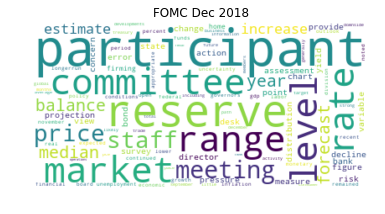

In [54]:
text = df1.words[1]

text = " ".join(words for words in df1.words)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate(text)
plt.figure()
plt.subplot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('FOMC Dec 2018')
plt.show()

### Word Cloud from the Mar 2019 Statement

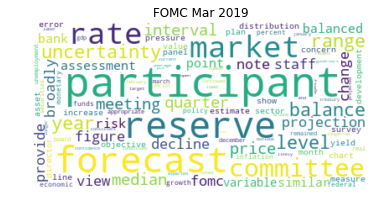

In [55]:
text = df2.words[1]

text = " ".join(words for words in df2.words)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.subplot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('FOMC Mar 2019')
plt.show()

In [56]:
Tsize1 = {'projections': 71, 'inflation': 89, 'growth': 70, 'market': 67, 'uncertainty': 36, 'risks': 46, 'foreign': 13, 'trade': 17, 'subdued': 0}

In [57]:
Tsize2 = {'projections': 160, 'inflation': 112, 'growth': 80, 'market': 79, 'uncertainty': 60, 'risks': 55, 'foreign': 13, 'trade': 12, 'subdued': 3}

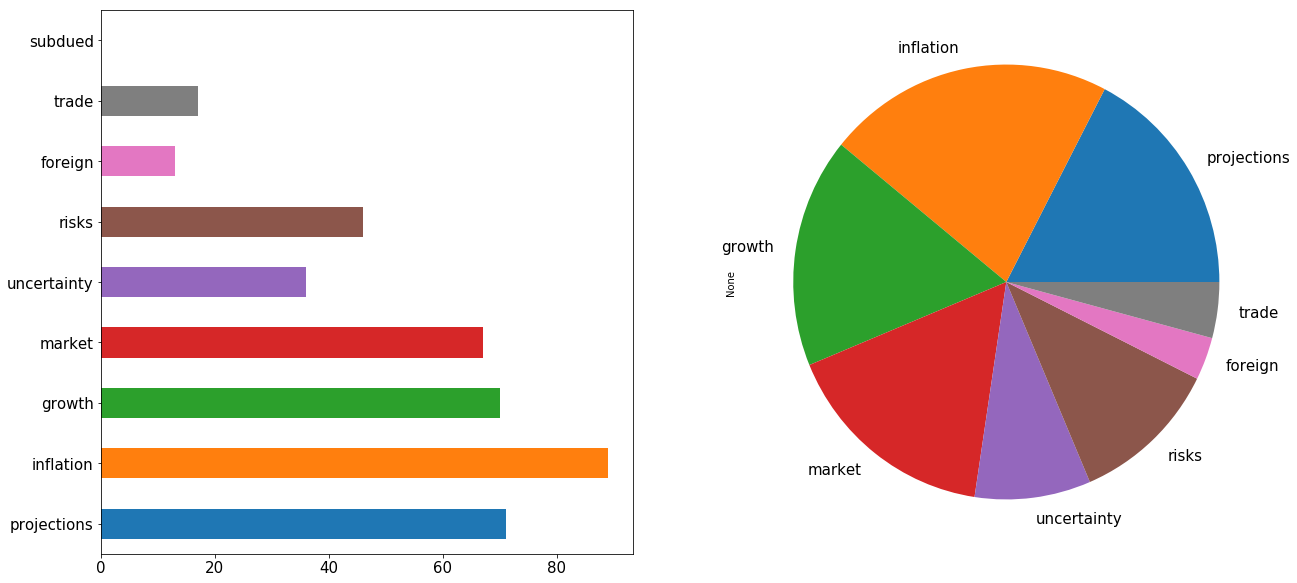

In [58]:
Tsize1 = pd.Series(Tsize1, index = ['projections', 'inflation', 'growth', 'market', 'uncertainty', 'risks', 'foreign', 'trade', 'subdued'])

plt.rcParams['figure.figsize'] = 21, 10
plt.subplot(121)
Tsize1.plot(kind='barh', fontsize=15)

plt.subplot(122)
Tsize1.plot(kind='pie', fontsize=15)


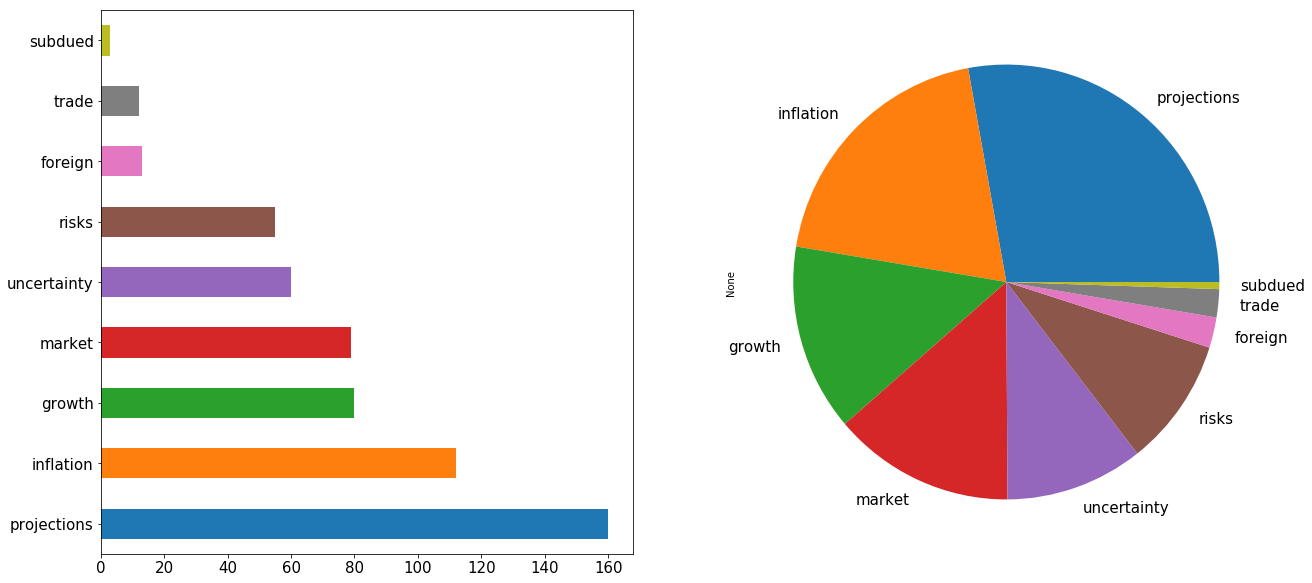

In [59]:
Tsize2 = pd.Series(Tsize2, index = ['projections', 'inflation', 'growth', 'market', 'uncertainty', 'risks', 'foreign', 'trade', 'subdued'])
plt.rcParams['figure.figsize'] = 21, 10
plt.subplot(121)
Tsize2.plot(kind='barh', fontsize=15)
plt.subplot(122)
Tsize2.plot(kind='pie', fontsize=15)

In [60]:
# df_comp = pd.DataFrame(columns = ['term', 'Dec-18', 'Mar-19'])

Text(0,0.5,'Term')

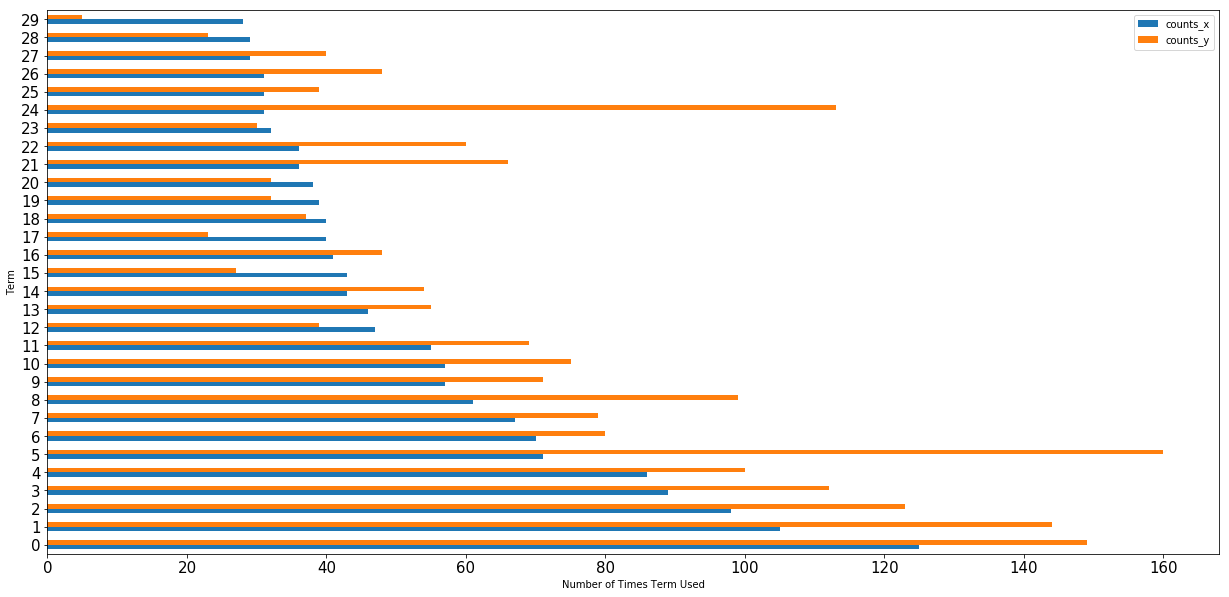

In [69]:
df4[0:30].plot.barh(legend=True, fontsize=15)
plt.xlabel('Number of Times Term Used')
plt.ylabel('Term')



In [67]:
risks=df4[df4['words'].str.contains('risks')]
risks

,words,counts_x,counts_y
13,risks,46,55


Text(0,0.5,'Risks')

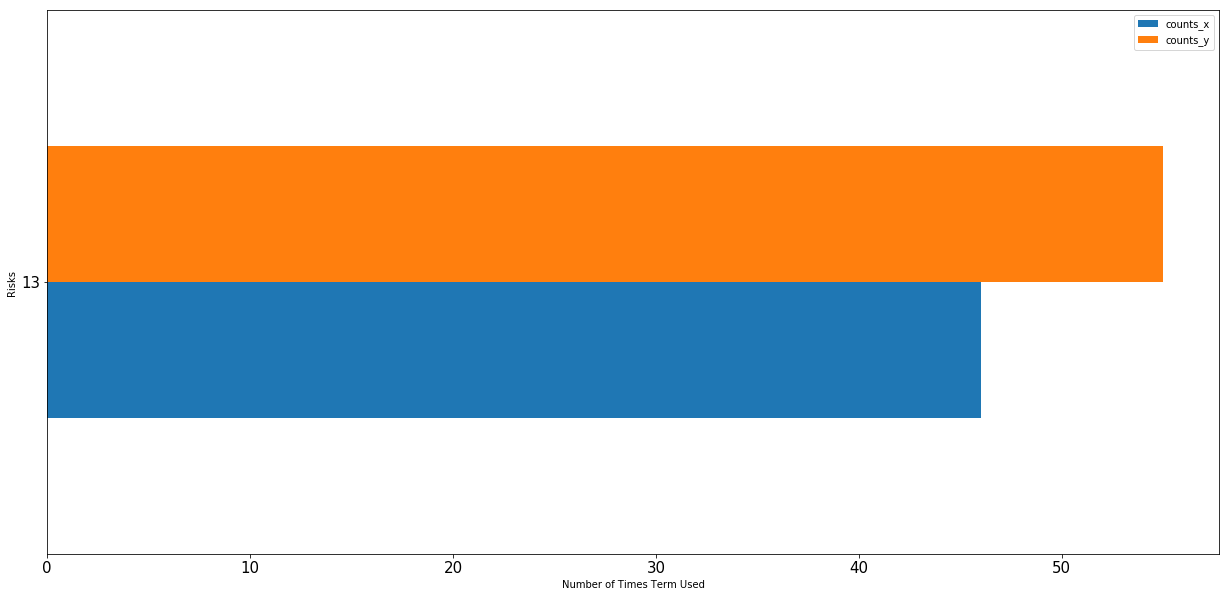

In [68]:
risks.plot.barh(legend=True, fontsize=15)
plt.xlabel('Number of Times Term Used')
plt.ylabel('Risks')